# Working with data

Regardless of rather we have real or simulated data, the main interface for `whimstan` to x-ray data is via the `Database` object which we can use to both examine the data as well as ship the data off to Stan.

First, let's examine the simulated data we created in the previous section.


In [1]:
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(context="talk", fscale=1, ticks=True, grid=False)

from whimstan import Database

[WARNING ] The naima package is not available. Models that depend on it will not be available


[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.


[WARNING ] The ebltable package is not available. Models that depend on it will not be available


[INFO    ] Starting 3ML!


[WARNING ] no display variable set. using backend for graphics without display (agg)


[WARNING ] ROOT minimizer not available


[WARNING ] Multinest minimizer not available


[WARNING ] PyGMO is not available


[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)


[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?


[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?


[WARNING ] No fermitools installed


[WARNING ] Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


[WARNING ] Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


[WARNING ] Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


In [2]:
db = Database.read("data.h5")

## The catalog object

The database contains a catalog object that holds info about the observations. If the database is made from simulations, the catalog object will also know about the simulated info for each GRB.


We can access the catalog dictionary with the names of the GRBs.

In [3]:
db.catalog.catalog["000"]

XRTCatalogEntry(name='000', ra=184.47390121057714, dec=-44.22857752842248, z=2.7259260528264164, nH_mw=0.08451678936809567, nH_host_sim=0.36465159350798676, index_sim=-1.2207854347857583, flux_sim=9.088906250518805e-11, n0_sim=1e-07, temp_sim=1000000.0)

In [4]:
db.catalog.catalog["001"]

XRTCatalogEntry(name='001', ra=265.76466450230396, dec=31.33611683539673, z=1.8428708381381365, nH_mw=0.04382423090031981, nH_host_sim=13.127907056078715, index_sim=-1.7597473454049504, flux_sim=8.215393160610223e-11, n0_sim=1e-07, temp_sim=1000000.0)

## Getting 3ML plugins from the database


We can create plugins from the data stored in the database for e.g. fitting the data in 3ML:

In [5]:
p = db.plugins["000"]


WARNING UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



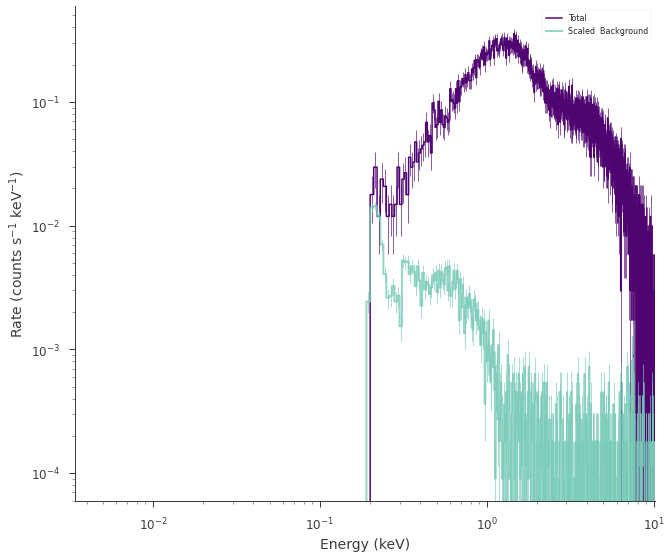

In [6]:
p.view_count_spectrum()


WARNING UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



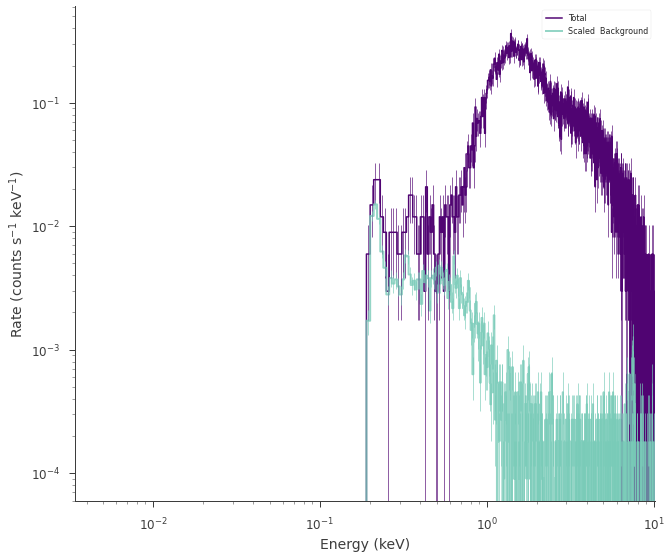

In [7]:
p = db.plugins["001"]
p.view_count_spectrum()

## Getting an 3ML analysis from the database


Additionally, we can build an analysis from the database.

In [8]:
ba = db.build_3ml_analysis(id=0)

Now we can fit in 3ML!
